In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/wine_test.csv")
data

,와인_종류,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,1,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760
1,1,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920
2,2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
3,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
4,2,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
68,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
69,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
70,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562


In [3]:
data['와인_종류'].value_counts()

와인_종류
2    29
1    24
3    19
Name: count, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   와인_종류                   72 non-null     int64  
 1   알코올_도수                  72 non-null     float64
 2   사과산_함량                  72 non-null     float64
 3   재_함량                    72 non-null     float64
 4   재의_알칼리도                 72 non-null     float64
 5   마그네슘_함량                 72 non-null     int64  
 6   총_페놀_함량                 72 non-null     float64
 7   플라보노이드_함량               72 non-null     float64
 8   비플라보노이드_페놀_함량           72 non-null     float64
 9   프로안토시아닌_함량              72 non-null     float64
 10  색_강도                    72 non-null     float64
 11  색조                      72 non-null     float64
 12  희석_와인의_투과율_OD280_OD315  72 non-null     float64
 13  프롤린_함량                  72 non-null     int64  
dtypes: float64(11), int64(3)
memory usage: 8.0 K

<Axes: >

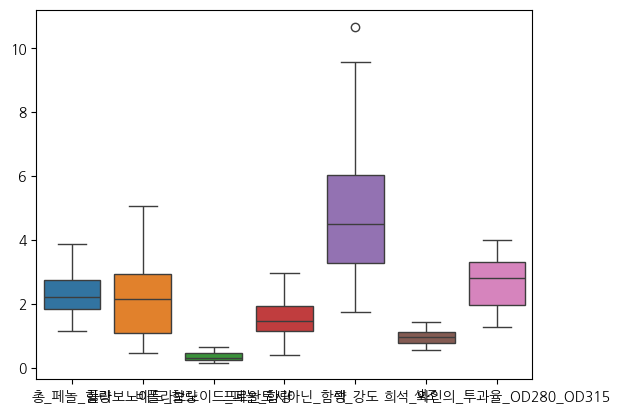

In [13]:
sns.boxplot(data.iloc[:,6:-1])

In [19]:
X = data.drop('와인_종류', axis=1)
y = data['와인_종류']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mms = MinMaxScaler()
X_train_temp = mms.fit_transform(X_train)
X_test_temp = mms.transform(X_test)
mms_X_train = pd.DataFrame(X_train_temp, columns=X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(X_test_temp, columns=X_test.columns, index=X_test.index)

# 데스트 데이터에 트레인 데이터에 해주었던 작업을 동일하게 적용
* MinMaxScaler로 스케일링
* 홀드아웃 - train, vaild, test
* mms = MinMaxScaler()
* mms_train = mms.fit_transform(X_train)
* mms_valid = mms.fit_transform(X_valid)
* mms_test =  mms.fit_transform(X_test)
* 이것을 어떻게 동일하게 스케일링 해줄것인가?

In [26]:
X_test = data.drop("와인_종류", axis=1)
y_test =  data["와인_종류"]

In [27]:
y_test = pd.get_dummies(y_test)
y_test

,1,2,3
0,True,False,False
1,True,False,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
67,False,False,True
68,True,False,False
69,False,True,False
70,False,True,False


# 훈련시 사용한 MinMaxScaler를 불러와 스케일링

In [30]:
import joblib

In [31]:
mms = joblib.load("./model/MinMax_info.joblib")
X_test_temp = mms.transform(X_test)
X_test = pd.DataFrame(X_test_temp, columns=X_test.columns)
X_test

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,0.839474,0.629098,0.618280,0.158537,0.564103,0.673077,0.796875,0.122449,0.580420,0.325939,0.333333,0.849421,0.389652
1,0.644737,0.182377,0.564516,0.603659,0.205128,0.557692,0.778125,0.244898,0.503497,0.325939,0.455285,0.826255,0.518998
2,0.647368,0.151639,0.473118,0.817073,0.038462,0.242308,0.421875,0.265306,0.213287,0.209898,0.406504,0.559846,0.156831
3,0.313158,0.075820,0.311828,0.512195,0.102564,0.426923,0.484375,0.510204,0.580420,0.121160,0.308943,0.652510,0.027486
4,0.192105,0.360656,0.838710,0.573171,0.243590,0.192308,0.481250,0.938776,0.220280,0.215017,0.609756,0.451737,0.265966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.563158,0.342213,0.543011,0.573171,0.461538,0.153846,0.059375,0.795918,0.363636,0.684300,0.097561,0.111969,0.454325
68,0.797368,0.145492,0.494624,0.329268,0.538462,0.673077,0.837500,0.204082,0.587413,0.372867,0.495935,0.918919,0.405821
69,0.365789,0.719262,0.736559,0.969512,0.230769,0.365385,0.512500,0.591837,0.451049,0.068259,0.357724,0.691120,0.070331
70,0.163158,0.153689,0.677419,0.939024,0.051282,0.257692,0.350000,0.530612,0.321678,0.112628,0.715447,0.725869,0.229588


# train 데이터로 학습한 베스트 모델을 불러와서 예측

In [32]:
from keras.models import load_model

In [34]:
best_model = load_model("./model/whitewine_loss0.066966__0273.keras")
result = best_model.evaluate(X_test,y_test)
print("loss", result[0], "accuracy", result[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9891 - loss: 0.0614
loss 0.06117373704910278 accuracy 0.9861111044883728


# 랜덤 포레스트 모델 불러와 분석하기

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [36]:
data = pd.read_csv("./data/wine_test.csv")
data

,와인_종류,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,1,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760
1,1,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920
2,2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
3,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
4,2,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
68,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
69,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
70,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562


In [37]:
data['와인_종류'].value_counts()

와인_종류
2    29
1    24
3    19
Name: count, dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   와인_종류                   72 non-null     int64  
 1   알코올_도수                  72 non-null     float64
 2   사과산_함량                  72 non-null     float64
 3   재_함량                    72 non-null     float64
 4   재의_알칼리도                 72 non-null     float64
 5   마그네슘_함량                 72 non-null     int64  
 6   총_페놀_함량                 72 non-null     float64
 7   플라보노이드_함량               72 non-null     float64
 8   비플라보노이드_페놀_함량           72 non-null     float64
 9   프로안토시아닌_함량              72 non-null     float64
 10  색_강도                    72 non-null     float64
 11  색조                      72 non-null     float64
 12  희석_와인의_투과율_OD280_OD315  72 non-null     float64
 13  프롤린_함량                  72 non-null     int64  
dtypes: float64(11), int64(3)
memory usage: 8.0 K

<Axes: >

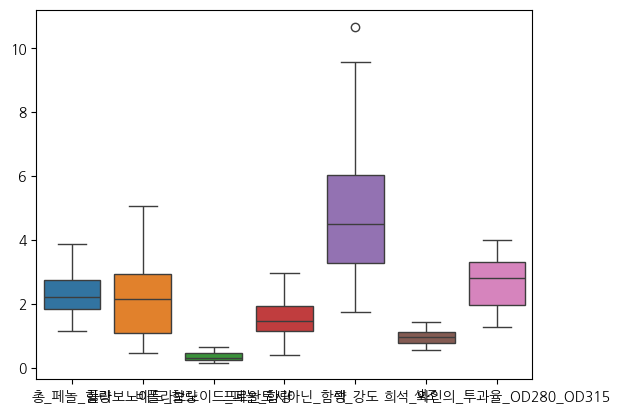

In [39]:
sns.boxplot(data.iloc[:,6:-1])

# 테스트 데이터에 트레인데이터에 해주었던 작업을 동일하게 적용

* MinMaxScaler로 스케일링
* 홀드아웃 - train, valid, test
* mms = MinMaxScaler()
* mms_train = mms.fit_transform(X_train)
* mms_valid = mms.transfrom(X_valid)
* mms_test = mms.transfrom(X_test)

In [40]:
X_test = data.drop("와인_종류", axis=1)
y_test = data['와인_종류']

# 훈련시 사용한 MinMaxScaler를 불러와 스케일링

In [41]:
import joblib

In [42]:
mms = joblib.load("./model/MinMax_info2.joblib")
X_test_temp = mms.transform(X_test)
X_test = pd.DataFrame(X_test_temp, columns=X_test.columns)
X_test

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,0.839474,0.629098,0.618280,0.158537,0.564103,0.673077,0.796875,0.122449,0.580420,0.325939,0.333333,0.849421,0.389652
1,0.644737,0.182377,0.564516,0.603659,0.205128,0.557692,0.778125,0.244898,0.503497,0.325939,0.455285,0.826255,0.518998
2,0.647368,0.151639,0.473118,0.817073,0.038462,0.242308,0.421875,0.265306,0.213287,0.209898,0.406504,0.559846,0.156831
3,0.313158,0.075820,0.311828,0.512195,0.102564,0.426923,0.484375,0.510204,0.580420,0.121160,0.308943,0.652510,0.027486
4,0.192105,0.360656,0.838710,0.573171,0.243590,0.192308,0.481250,0.938776,0.220280,0.215017,0.609756,0.451737,0.265966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.563158,0.342213,0.543011,0.573171,0.461538,0.153846,0.059375,0.795918,0.363636,0.684300,0.097561,0.111969,0.454325
68,0.797368,0.145492,0.494624,0.329268,0.538462,0.673077,0.837500,0.204082,0.587413,0.372867,0.495935,0.918919,0.405821
69,0.365789,0.719262,0.736559,0.969512,0.230769,0.365385,0.512500,0.591837,0.451049,0.068259,0.357724,0.691120,0.070331
70,0.163158,0.153689,0.677419,0.939024,0.051282,0.257692,0.350000,0.530612,0.321678,0.112628,0.715447,0.725869,0.229588


In [43]:
import joblib
from sklearn.metrics import classification_report

In [45]:
rfc = joblib.load("./model/rfc_model.joblib")
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        24
           2       1.00      0.97      0.98        29
           3       1.00      1.00      1.00        19

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

